using t3


2024-06-18 20:36:03,138:tetra3.Tetra3-INFO: Loading database from: /Users/mlang/miniconda3/lib/python3.11/site-packages/tetra3/data/default_database.npz


{'ra': 5.577046397036678, 'dec': 0.7724998644193919, 'eq_roll': 1.0367756386854592}
Using existing star detection data


Using existing star detection data


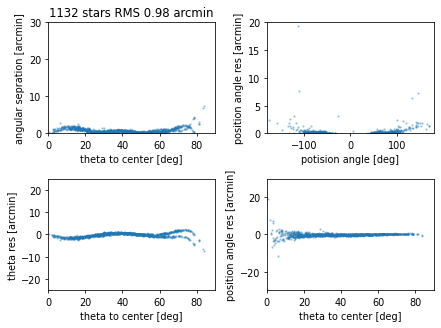

2024-06-18 20:37:16,415:tetra3.Tetra3-INFO: Loading database from: /Users/mlang/miniconda3/lib/python3.11/site-packages/tetra3/data/default_database.npz


using t3
{'ra': 4.093174734486102, 'dec': -0.4592125381285853, 'eq_roll': 0.10361011791792556}
Using existing star detection data


/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Using existing star detection data


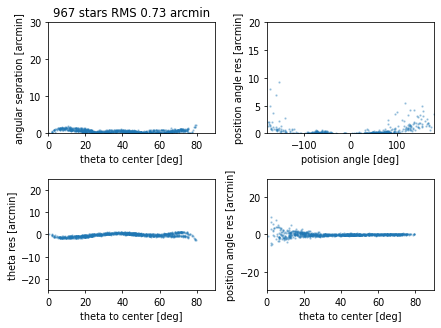

2024-06-18 20:38:28,043:tetra3.Tetra3-INFO: Loading database from: /Users/mlang/miniconda3/lib/python3.11/site-packages/tetra3/data/default_database.npz


using t3
{'ra': 2.512415581939565, 'dec': 0.5936297530534803, 'eq_roll': 5.268698845946506}
Using existing star detection data


Using existing star detection data


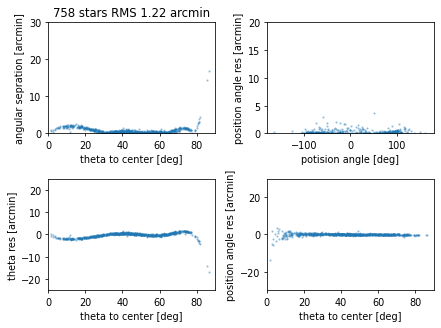

2024-06-18 20:39:35,635:tetra3.Tetra3-INFO: Loading database from: /Users/mlang/miniconda3/lib/python3.11/site-packages/tetra3/data/default_database.npz


using t3
{'ra': 4.009565854158823, 'dec': 0.6911789978341928, 'eq_roll': 4.301829631388864}
Using existing star detection data


Using existing star detection data


/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/mlang/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


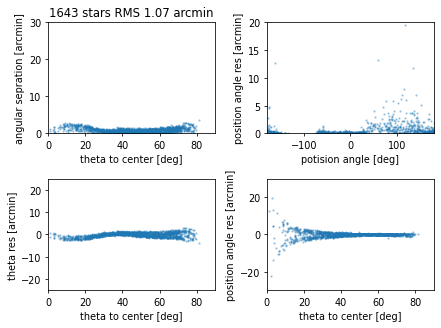

In [1]:
from utils import FishEyeImage, rot
from scipy.ndimage import map_coordinates
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, angular_separation, position_angle, offset_by, ICRS
import astropy.units as u
from PIL import Image
from scipy.optimize import minimize, curve_fit, differential_evolution

from pano import pano_fisheye

for i in np.arange(1,5):
    file = '0'+str(i)
    # imgfile = '00'+str(i)+'_0333-已增强-NR'
    zhangbei = EarthLocation(lon=115*u.deg+14*u.arcsec,lat=41*u.deg+13*u.arcmin+53*u.arcsec,height = 1466)
    dunhuang  = EarthLocation(lon=94.322799*u.deg,lat=40.359581*u.deg,height = 1100)
    lenghu = EarthLocation(lon=93.9018774741078*u.deg,lat=38.59868881470391*u.deg,height = 3500)
    pic = FishEyeImage(file+'.CR3',img_path=file+'.jpg', loc = lenghu, mag_limit=6.5)


    solution = pic.solve(solve_size=600)

    rms = pic.xmatch()
    pic.outlier_cliping(clip_data='a_sep', theta_range=(0,90), bin_n=10, sigma=2)
    result1  = pic.optimize()
    pic.outlier_cliping(clip_data='a_sep', theta_range=(0,70), bin_n=10, sigma=1.5)
    pic.outlier_cliping(clip_data='pa', theta_range=(40,90), bin_n=6, sigma=1.5)
    result2  = pic.distort_optimize()

    rms2 = pic.xmatch()
    pic.outlier_cliping(clip_data='a_sep', theta_range=(0,85), bin_n=7, sigma=1.5)
    pic.outlier_cliping(clip_data='a_sep', theta_range=(0,90), bin_n=15, sigma=1.5)
    result  = pic.optimize(minmize_func=differential_evolution)
    pic.draw_residual(alpha=0.3,dpi=70,s=2)


    rgb = pano_fisheye(pic,output_fov=220)
    rgb2 = np.uint8(rgb*255)
    output = Image.fromarray(rgb2)
    output.save('pano'+str(i)+'.jpg')

In [4]:
import exiftool
from astropy.time import Time


for i in np.arange(1,5):
    raw_path = '0'+str(i)+'.CR3'
    with exiftool.ExifToolHelper() as et:
        exif = et.get_metadata(raw_path)[0]
        time = exif['EXIF:DateTimeOriginal']
        offset = exif['EXIF:OffsetTime']
    time = time.replace(':', '-', 2)
    obstime = Time(time)-int(offset[0:3])*u.hour
    print(obstime)

2024-06-03 16:07:26.000
2024-06-03 16:07:42.000
2024-06-03 16:07:19.000
2024-06-03 16:07:59.000
